# Zadanie nr 3 - text mining
**Sylwester Mikołajczuk, 71409**

1. Utworzyć korpus dokumentów na podstawie 5-10 książek pobranych ze strony wolne lektury


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import urllib
import pandas as pd
from collections import Counter
import spacy

In [2]:
lektury = ('https://wolnelektury.pl/media/book/txt/arystoteles-poetyka.txt', 'https://wolnelektury.pl/media/book/txt/romeo-i-julia.txt', 'https://wolnelektury.pl/media/book/txt/demostenes-wybor-mow.txt',
           'https://wolnelektury.pl/media/book/txt/krol-macius-pierwszy.txt', 'https://wolnelektury.pl/media/book/txt/platon-eutyfron.txt')

korpus = [urllib.request.urlopen(ksiazka).read().decode('utf8') for ksiazka in lektury]


2. Dla wybranej pozycji korpusu  zwizualizować częstość występowania tokenów. Jako tokeny przyjmujemy tylko tokeny zbudowane wyłącznie z liter.

In [3]:
stopwordy = (urllib.request.urlopen('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').read().decode('utf8')).split('\n')
nlp = spacy.load("pl_core_news_md")
tokens = list(filter(lambda x: x.text.isalpha() and x.lemma_ not in stopwordy and len(x.text) > 1, nlp(urllib.request.urlopen(
    'https://wolnelektury.pl/media/book/txt/krol-macius-pierwszy.txt').read().decode('utf8'))))
tokenlist = [ksiazka.lemma_.lower() for ksiazka in tokens]
#tylko 15 elementow ze wzgledu na duzy plik
czestosc = Counter(tokenlist)
czestosc

Counter({'maciuś': 1298, 'król': 701, 'mieć': 547, 'móc': 353, 'minister': 332, 'chcieć': 321, 'dziecko': 314, 'powiedzieć': 307, 'klu': 270, 'królewski': 264, 'mówić': 248, 'wiedzieć': 240, 'wojna': 224, 'siebie': 196, 'musieć': 184, 'swój': 183, 'felek': 175, 'raz': 173, 'zrobić': 165, 'wszystek': 152, 'robić': 140, 'zacząć': 140, 'mość': 133, 'potem': 118, 'myśleć': 118, 'dzień': 117, 'drugi': 108, 'iść': 108, 'bum': 106, 'list': 104, 'żołnierz': 103, 'głowa': 102, 'trzy': 98, 'wojsko': 97, 'pisać': 96, 'prosić': 93, 'biały': 93, 'stać': 92, 'trochę': 91, 'ręka': 89, 'dać': 88, 'mały': 84, 'człowiek': 83, 'pierwszy': 82, 'godzina': 82, 'wielki': 80, 'zaraz': 80, 'napisać': 79, 'stary': 79, 'dom': 79, 'gazeta': 78, 'zagraniczny': 77, 'długo': 77, 'poseł': 77, 'wcale': 76, 'siedzieć': 76, 'czarny': 76, 'prawo': 74, 'czas': 73, 'stolica': 73, 'miasto': 71, 'szkoła': 70, 'papier': 66, 'rok': 66, 'widzieć': 66, 'chłopiec': 64, 'wziąć': 63, 'ogród': 63, 'jechać': 63, 'zostać': 62, 'prezes

3. Zbudować macierz tfidf i wskazać 10 słów kluczowych dla każdej pozycji

In [4]:
#Stworzenie funkcji tokenizera z poprzedniego pliku
def token_func(ksiazka):
    stopwordy = (urllib.request.urlopen('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').read().decode('utf8')).split('\n')
    nlp = spacy.load("pl_core_news_md")
    tokens = list(filter(lambda x: x.text.isalpha() and x.lemma_ not in stopwordy and len(x.text) > 1, nlp(ksiazka)))
    return [ksiazka.lemma_.lower() for ksiazka in tokens]

vector = TfidfVectorizer(tokenizer=token_func)
#doposowanie modely
_fit = vector.fit_transform(korpus)
matrix = pd.DataFrame(data = _fit.toarray(), index=lektury, columns = vector.get_feature_names_out())
print(matrix)



/home/sylwester.mikolajczuk/.sage/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                                                          aa    abdera  \
https://wolnelektury.pl/media/book/txt/arystote...  0.000000  0.000000   
https://wolnelektury.pl/media/book/txt/romeo-i-...  0.000000  0.000000   
https://wolnelektury.pl/media/book/txt/demosten...  0.000000  0.001545   
https://wolnelektury.pl/media/book/txt/krol-mac...  0.000669  0.000000   
https://wolnelektury.pl/media/book/txt/platon-e...  0.000000  0.000000   

                                                    abecadło   abraham  \
https://wolnelektury.pl/media/book/txt/arystote...  0.000000  0.000000   
https://wolnelektury.pl/media/book/txt/romeo-i-...  0.002131  0.017047   
https://wolnelektury.pl/media/book/txt/demosten...  0.000000  0.000000   
https://wolnelektury.pl/media/book/txt/krol-mac...  0.000000  0.000000   
https://wolnelektury.pl/media/book/txt/platon-e...  0.000000  0.000000   

                                                    absolutnie  absolutny  \
https://wolnelektury.pl/media/boo

4. W oparciu o podobieństwo kosinusowe zbudować macierz odległości dokumentów. 
    

In [7]:
count = CountVectorizer(tokenizer=token_func).fit_transform(korpus)
pod_kos = pd.DataFrame(np.matrix(cosine_similarity(count)))
pod_kos

,0,1,2,3,4
0,1.000000,0.250354,0.358858,0.215676,0.257162
1,0.250354,1.000000,0.326956,0.322328,0.237600
2,0.358858,0.326956,1.000000,0.354775,0.298521
3,0.215676,0.322328,0.354775,1.000000,0.237711
4,0.257162,0.237600,0.298521,0.237711,1.000000


5. Wykorzytując PCA przeprowadzić redukcję wymiarowości wymiarów macierzy tf-idf do 2 wymiarów  i zwizualizować położenie dokumentów na układzie współrzędnych.  

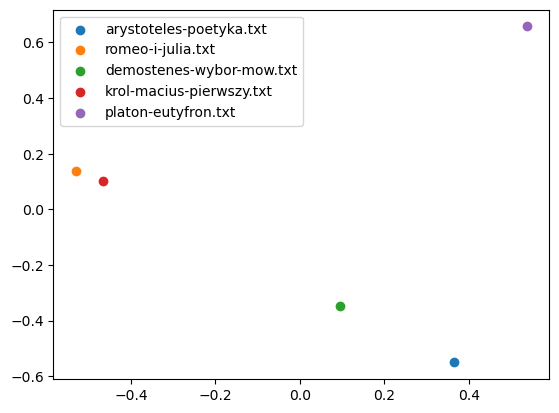

In [15]:
mat = PCA(n_components=2)
mat2 = (mat.fit_transform(np.asarray(_fit.todense())))
fig = plt.gcf()

for i in range(len(lektury)):
    matx, maty = mat2[i]
    plt.scatter(matx, maty, label=lektury[i][39:])

plt.legend()
plt.show()